# Assignment No 13 : Various CNN Networks on MNIST Dataset

### Resources :

- Thanks AAIC Team
- Google Search ,Kaggle,Sklearn
- KrushitReddy
- https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3428/assignment-try-various-cnn-networks-on-mnist-dataset/8/module-8-neural-networks-computer-vision-and-deep-learning
- https://github.com/krushithreddy
- https://scikit-learn.org/stable/index.html
- https://www.kaggle.com/

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2569300072973465564
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3073183043060002416
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4280592809299709593
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 747777203186092895
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
batch_size = 50
num_classes = 10
epochs = 30

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x,vy,'b',label="Validation Loss")
  ax.plot(x,ty,'r',label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()
 

#**MODEL-1 :  3-LAYER ARCHITECTURE**

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3277056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 385us/step - loss: 0.1326 - acc: 0.9597 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 2/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.0491 - acc: 0.9857 - val_loss: 0.0279 - val_acc: 0.9907
Epoch 3/30
60000/60000 [==============================] - 20s 328us/step - loss: 0.0337 - acc: 0.9896 - val_loss: 0.0277 - val_acc: 0.9905
Epoch 4/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0249 - val_acc: 0.9926
Epoch 5/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.0199 - val_acc: 0.9942
Epoch 6/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0241 - val_acc: 0.9928
Epoch 7/30
60000/60000 [==============================] - 20s 330us/

Test score: 0.053601732978990756
Test accuracy: 0.9929


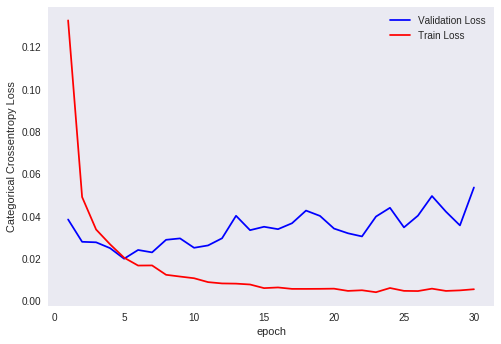

In [17]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**MODEL-2 : 5-LAYER ARCHITECTURE**

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 64)          32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 32)          8224      
__________

In [19]:

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 381us/step - loss: 0.2053 - acc: 0.9358 - val_loss: 0.0510 - val_acc: 0.9855
Epoch 2/30
60000/60000 [==============================] - 22s 369us/step - loss: 0.0623 - acc: 0.9822 - val_loss: 0.0449 - val_acc: 0.9852
Epoch 3/30
60000/60000 [==============================] - 22s 370us/step - loss: 0.0470 - acc: 0.9866 - val_loss: 0.0398 - val_acc: 0.9879
Epoch 4/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.0380 - acc: 0.9893 - val_loss: 0.0317 - val_acc: 0.9906
Epoch 5/30
60000/60000 [==============================] - 22s 362us/step - loss: 0.0327 - acc: 0.9903 - val_loss: 0.0451 - val_acc: 0.9866
Epoch 6/30
60000/60000 [==============================] - 22s 362us/step - loss: 0.0279 - acc: 0.9919 - val_loss: 0.0260 - val_acc: 0.9924
Epoch 7/30
60000/60000 [==============================] - 22s 361us/step - loss: 0.0260 - acc: 0.9927 - val_loss: 0.

Test score: 0.03388008741546946
Test accuracy: 0.993


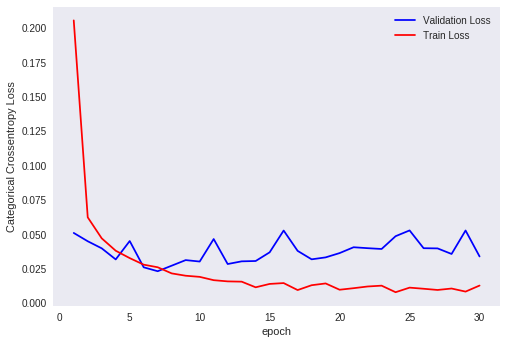

In [20]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**MODEL-3 : 7-LAYER ARCHITECTURE**

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (7, 7), activation='relu'))

model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (5, 5), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (2, 2), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 64)        100416    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 10, 10, 128)       401536    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 6, 6, 256)         819456    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 4, 128)         295040    
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 2, 2, 64)          73792     
__________

In [30]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 34s 563us/step - loss: 0.5734 - acc: 0.8059 - val_loss: 0.1081 - val_acc: 0.9745
Epoch 2/30
60000/60000 [==============================] - 32s 540us/step - loss: 0.1136 - acc: 0.9726 - val_loss: 0.0887 - val_acc: 0.9779
Epoch 3/30
60000/60000 [==============================] - 32s 541us/step - loss: 0.0862 - acc: 0.9791 - val_loss: 0.0664 - val_acc: 0.9826
Epoch 4/30
60000/60000 [==============================] - 32s 539us/step - loss: 0.0761 - acc: 0.9818 - val_loss: 0.0550 - val_acc: 0.9846
Epoch 5/30
60000/60000 [==============================] - 32s 540us/step - loss: 0.0654 - acc: 0.9846 - val_loss: 0.0488 - val_acc: 0.9873
Epoch 6/30
60000/60000 [==============================] - 32s 541us/step - loss: 0.0631 - acc: 0.9858 - val_loss: 0.0584 - val_acc: 0.9872
Epoch 7/30
60000/60000 [==============================] - 32s 540us/step - loss: 0.0599 - acc: 0.9863 - val_loss: 0.

Test score: 0.06585598365341304
Test accuracy: 0.9885


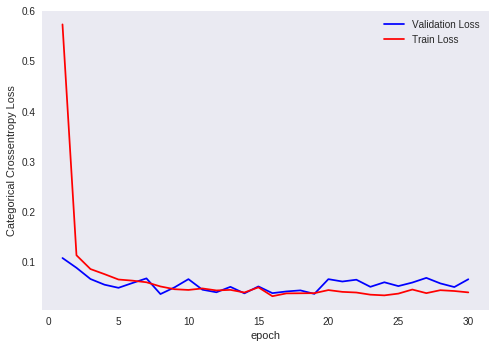

In [31]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclution :

In [2]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model","Test-score", "Test-accuracy","Epochs"]

x.add_row(["1","0.053","0.992","5"])

x.add_row(["2","0.033","0.993","7"])

x.add_row(["3","0.065","0.988","11"])

print(x)

+-------+------------+---------------+--------+
| Model | Test-score | Test-accuracy | Epochs |
+-------+------------+---------------+--------+
|   1   |   0.053    |     0.992     |   5    |
|   2   |   0.033    |     0.993     |   7    |
|   3   |   0.065    |     0.988     |   11   |
+-------+------------+---------------+--------+


1. As we can see in the error plots Model 1 and Model 2 are overfitting.
2. Model 3 seems to be working well even model 3 has less test-accurarcy compared to model 1&2 but model 3 is not overfitting. 